In [ ]:
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries
import ast
import math
from geopy.geocoders import Nominatim
# libraries for displaying images
from IPython.display import Image
from IPython.core.display import HTML
from folium.plugins import FloatImage
import folium # plotting library

# Plotly
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
#import plotly.plotly as py
init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aakankshasingh21","key":"fa1cd9a9ab573a95c71dc4f5104294d9"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

 99% 88.0M/89.0M [00:03<00:00, 32.1MB/s]
100% 89.0M/89.0M [00:03<00:00, 24.8MB/s]


In [ ]:
!unzip zomato-bangalore-restaurants.zip

Archive:  zomato-bangalore-restaurants.zip
  inflating: zomato.csv              


In [ ]:
df = pd.read_csv('zomato.csv')

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
# #df = df.drop(['url','phone','address','menu_item'],axis=1)
# df.head()

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
df.dropna(how ='any',inplace=True)
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df = df.loc[df.rate != 'NEW']
remove = lambda x: x.replace('/5','') if (type(x) == str) else x
df.rate = df.rate.apply(remove).str.strip().astype(float)
df.head()

<ipython-input-13-4bef6a5823c6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df = df.rename(columns ={'approx_cost(for two people)': 'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.cost = df.cost.apply(lambda x: x.replace(',','.'))
df.cost = df.cost.astype(float)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.reviews_list = df.reviews_list.str.lower()

punctuations = string.punctuation

def remove_punct(text):
  return text.translate(str.maketrans('','',punctuations))

df.reviews_list = df.reviews_list.apply(lambda text: remove_punct(text))

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn a beautiful place to dine int...,[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,rated 40 ratedn had been here for dinner with...,[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience is not that good eno...,[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,rated 40 ratedn great food and proper karnata...,[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,rated 40 ratedn very good restaurant in neigh...,[],Buffet,Banashankari


In [ ]:
# df['reviews_list'] =  df['reviews_list'].apply(ast.literal_eval)
df['menu_item'] =  df['menu_item'].apply(ast.literal_eval)

In [ ]:
li = []
def func(x):
    global li
    li = li + x
_ = df[df['menu_item']!="[]"]['menu_item'].apply(func)

In [ ]:
 # convert all the menu to lower case letter and storing in the variable food_corpus
food_corpus = list(map(str.lower, set(li)))

In [ ]:
len(food_corpus)

94486

In [ ]:
menu_corpus = []
for x in food_corpus:
    menu_corpus.append(re.sub("\[.*\]|\(.*\)", "", x).strip())

In [ ]:
remove_words = ['poi', 'spite', 'churi', 'peni', 'packing', 'meal', 'malt', 'smilies', 'disco', 'tac', 'cap', 'spicy', 'last night', 'cop',
'brain', 'onion', 'spice', 'holige', 'adas', 'sulaimani', 'special', 'combo 4', 'toppings', 'smile', 'water', 'ghee', '',
'mixed', 'slice', 'lunch', 'masala c', 'churi', 'breakfast combo', 'undo', 'full meal', 'fanta', 'cool blue', 'love', 'veg lovers',
'irish', 'fried', 'mast', 'rose', 'overload']

In [ ]:
# Lets remove them from our corpus first
new_menu_corpus = [word for word in menu_corpus if word not in remove_words]

In [ ]:
len(new_menu_corpus)

94435

In [ ]:
# perfect now those noise are removed, let us extract menus from review and store it in the column liked_food_from_review

df['liked_food_from_review'] = "[]"

In [ ]:
df['liked_food_from_review'] =  df['liked_food_from_review'].apply(ast.literal_eval)

In [ ]:
# Also lets convert dishes from our dish_liked column to lower case letters
df['dish_liked'] = df['dish_liked'].str.lower()

In [ ]:
# Also lets split dish_liked
df['menus_combined'] = df['dish_liked'].str.split()+ df['liked_food_from_review']

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city,liked_food_from_review,menus_combined
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn a beautiful place to dine int...,[],Buffet,Banashankari,[],"[pasta,, lunch, buffet,, masala, papad,, panee..."
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800.0,rated 40 ratedn had been here for dinner with...,[],Buffet,Banashankari,[],"[momos,, lunch, buffet,, chocolate, nirvana,, ..."
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience is not that good eno...,[],Buffet,Banashankari,[],"[churros,, cannelloni,, minestrone, soup,, hot..."
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300.0,rated 40 ratedn great food and proper karnata...,[],Buffet,Banashankari,[],"[masala, dosa]"
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600.0,rated 40 ratedn very good restaurant in neigh...,[],Buffet,Banashankari,[],"[panipuri,, gol, gappe]"


#Visualization

In [ ]:
restaurant_count = df['rest_type'].value_counts()


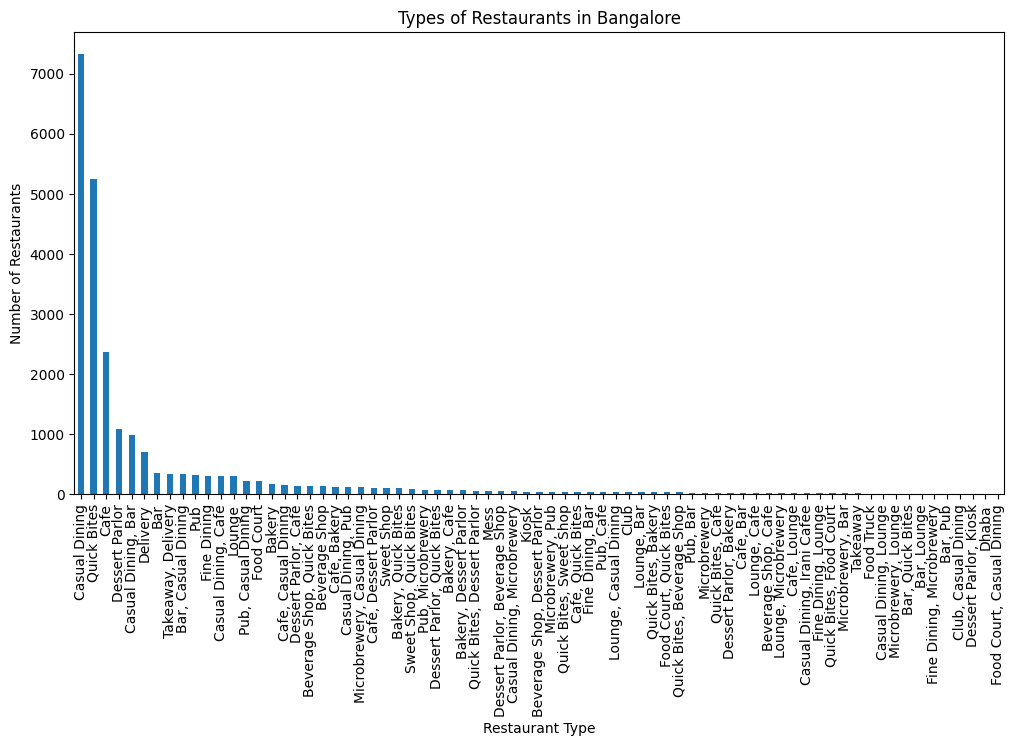

In [ ]:
plt.figure(figsize=(12, 6))
restaurant_count.plot(kind='bar')
plt.title('Types of Restaurants in Bangalore')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()


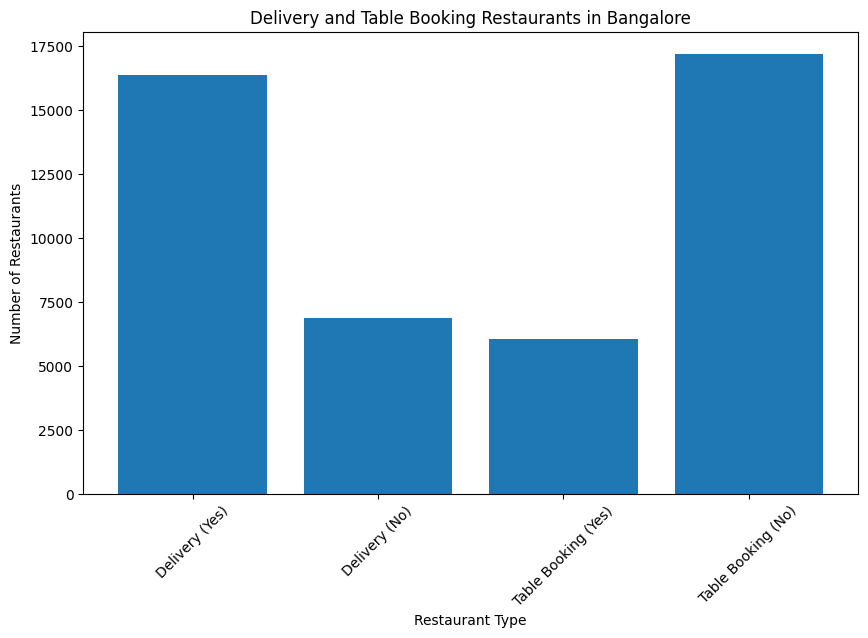

In [ ]:
# Create subsets of data for Delivery and Table Booking restaurants
delivery_yes = df[df['online_order'] == 'Yes']
delivery_no = df[df['online_order'] == 'No']
table_booking_yes = df[df['book_table'] == 'Yes']
table_booking_no = df[df['book_table'] == 'No']

# Count the number of each type of restaurant
delivery_yes_count = len(delivery_yes)
delivery_no_count = len(delivery_no)
table_booking_yes_count = len(table_booking_yes)
table_booking_no_count = len(table_booking_no)

# Visualize the data using a bar plot
categories = ['Delivery (Yes)', 'Delivery (No)', 'Table Booking (Yes)', 'Table Booking (No)']
counts = [delivery_yes_count, delivery_no_count, table_booking_yes_count, table_booking_no_count]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, counts)
plt.title('Delivery and Table Booking Restaurants in Bangalore')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


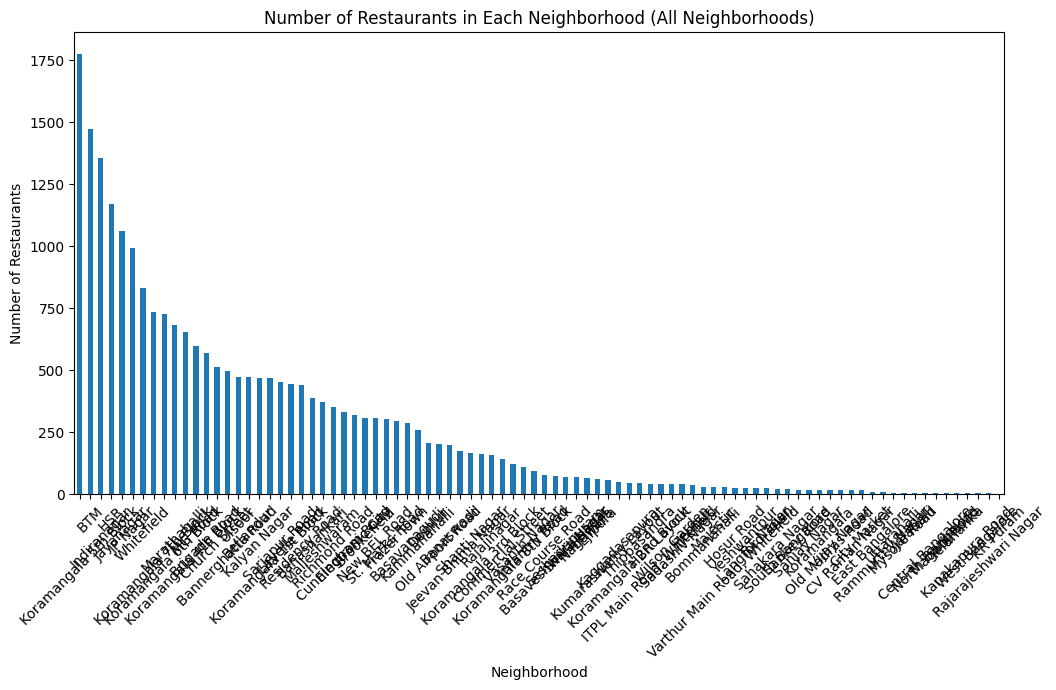

In [ ]:
# Count the number of restaurants in each neighborhood
neighborhood_counts = df['location'].value_counts()

# Get the total number of unique neighborhoods
total_neighborhoods = neighborhood_counts.nunique()

# Select all the neighborhoods to plot
N = total_neighborhoods

# Create a bar plot
plt.figure(figsize=(12, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Number of Restaurants in Each Neighborhood (All Neighborhoods)')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()






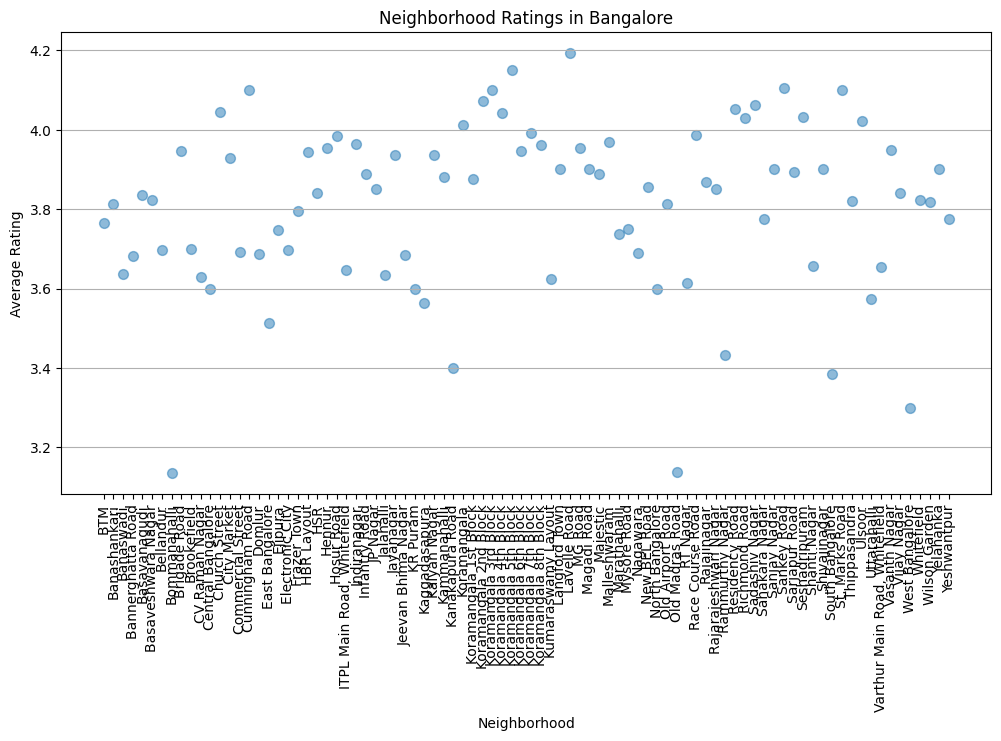

In [ ]:
# Calculate the average rating for each neighborhood
neighborhood_ratings = df.groupby('location')['rate'].mean().reset_index()

# Create a scatter plot of neighborhood vs. average rating
plt.figure(figsize=(12, 6))
plt.scatter(neighborhood_ratings['location'], neighborhood_ratings['rate'], s=50, alpha=0.5)
plt.title('Neighborhood Ratings in Bangalore')
plt.xlabel('Neighborhood')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

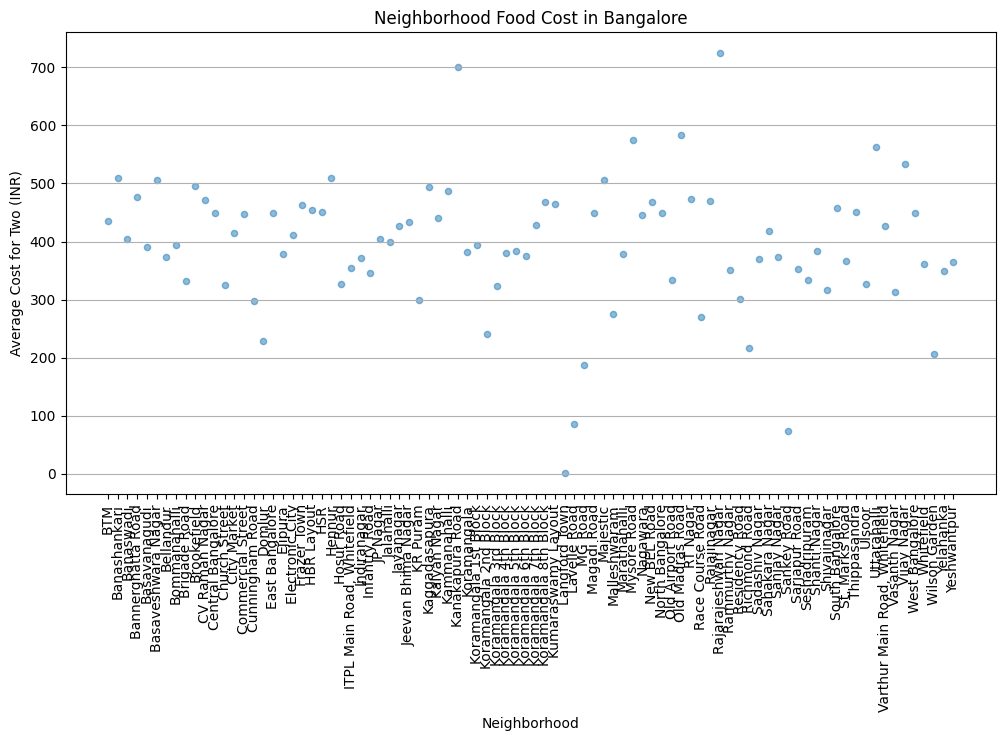

In [ ]:
average_cost = df.groupby('location')['cost'].mean().reset_index()
# Create a scatter plot of neighborhood vs. average cost for two
plt.figure(figsize=(12, 6))
plt.scatter(average_cost['location'], average_cost['cost'], s=20, alpha=0.5)
plt.title('Neighborhood Food Cost in Bangalore')
plt.xlabel('Neighborhood')
plt.ylabel('Average Cost for Two (INR)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

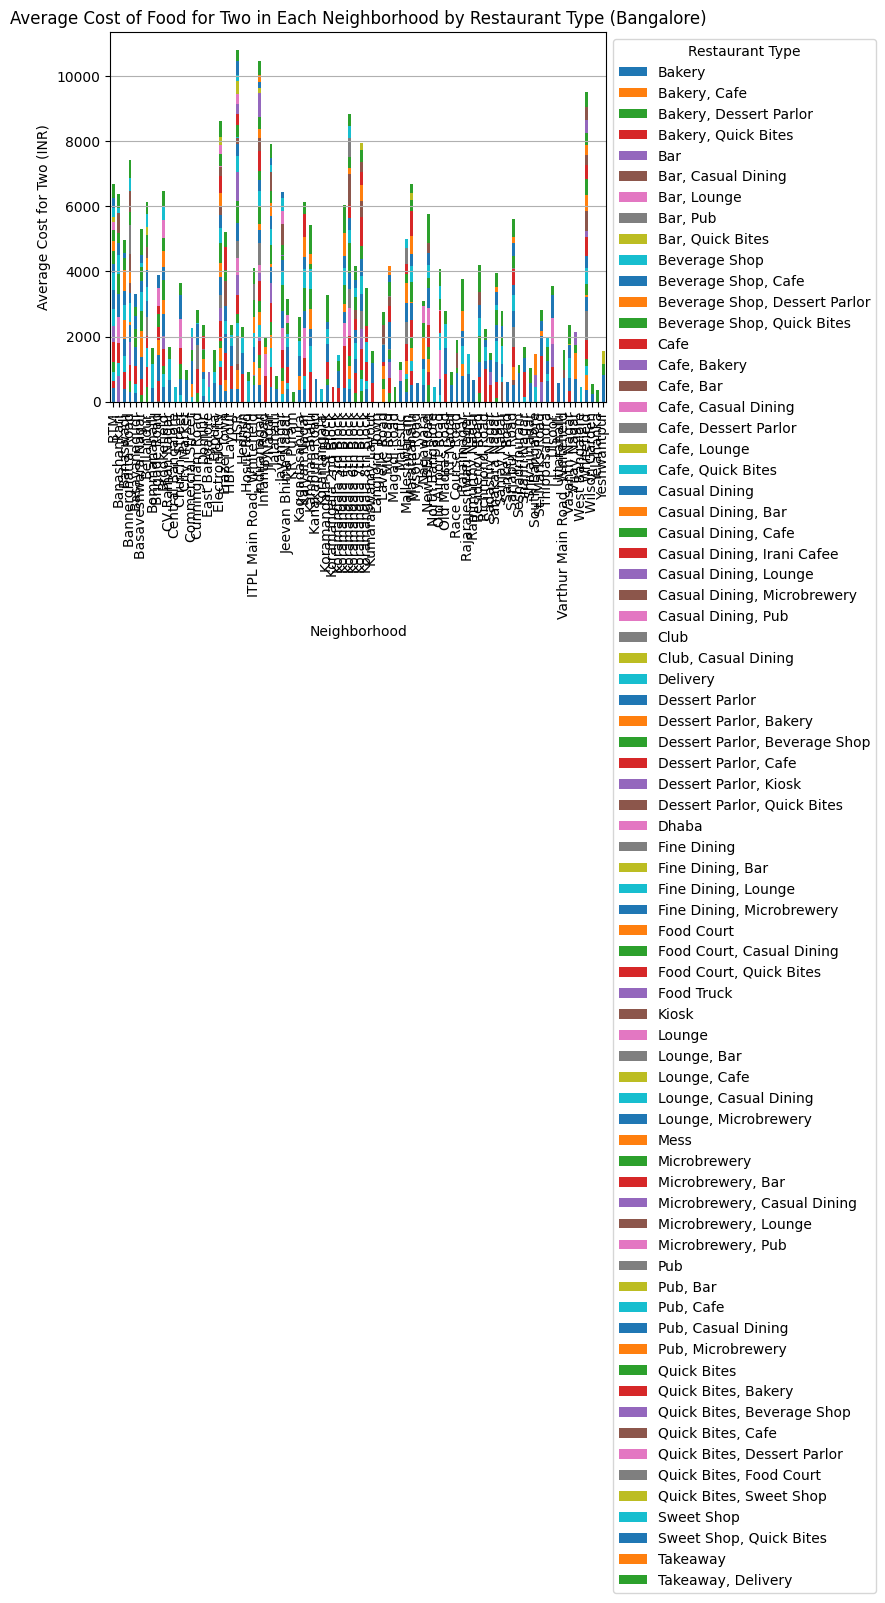

In [ ]:
# Group the data by neighborhood and restaurant type and calculate the mean cost for two
neighborhood_avg_cost = df.groupby(['location', 'rest_type'])['cost'].mean().unstack().reset_index()

# Set the neighborhood as the index for plotting
neighborhood_avg_cost.set_index('location', inplace=True)

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
neighborhood_avg_cost.plot(kind='bar', stacked=True)
plt.title('Average Cost of Food for Two in Each Neighborhood by Restaurant Type (Bangalore)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Cost for Two (INR)')
plt.xticks(rotation=90)
plt.legend(title='Restaurant Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()





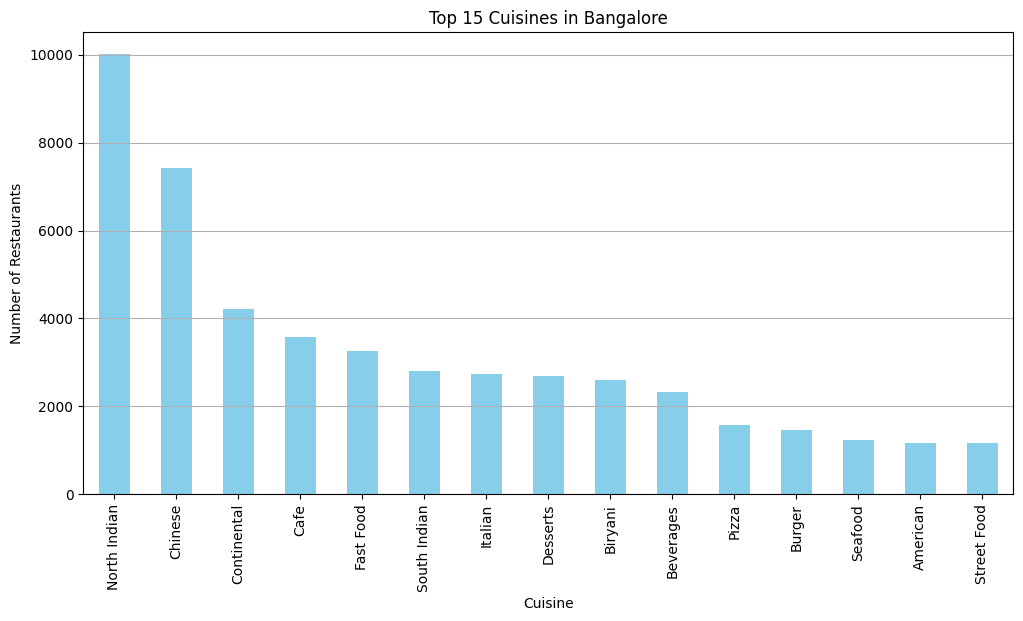

In [ ]:
# Get the top 15 cuisines in Bangalore
top_cuisines = df['cuisines'].str.split(', ', expand=True).stack().value_counts().head(15)

# Create a bar chart to visualize the top 15 cuisines
plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 15 Cuisines in Bangalore')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()




Cuisine Types

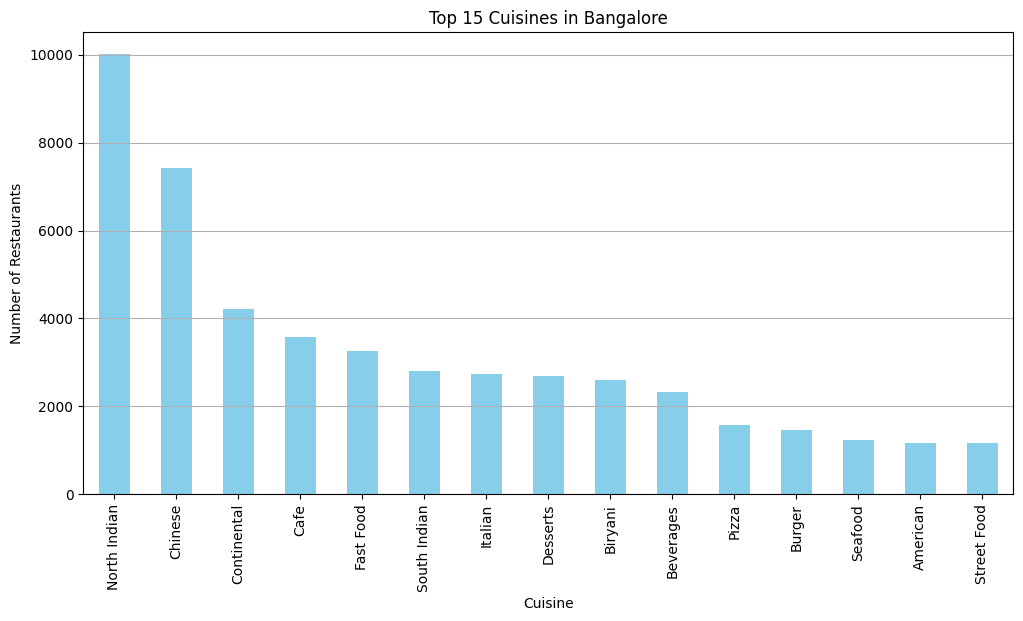

In [ ]:
cuisine_counts = df['cuisines'].str.split(', ', expand=True).stack().value_counts()
top_cuisines = cuisine_counts.head(15)

plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 15 Cuisines in Bangalore')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Restaurant Types

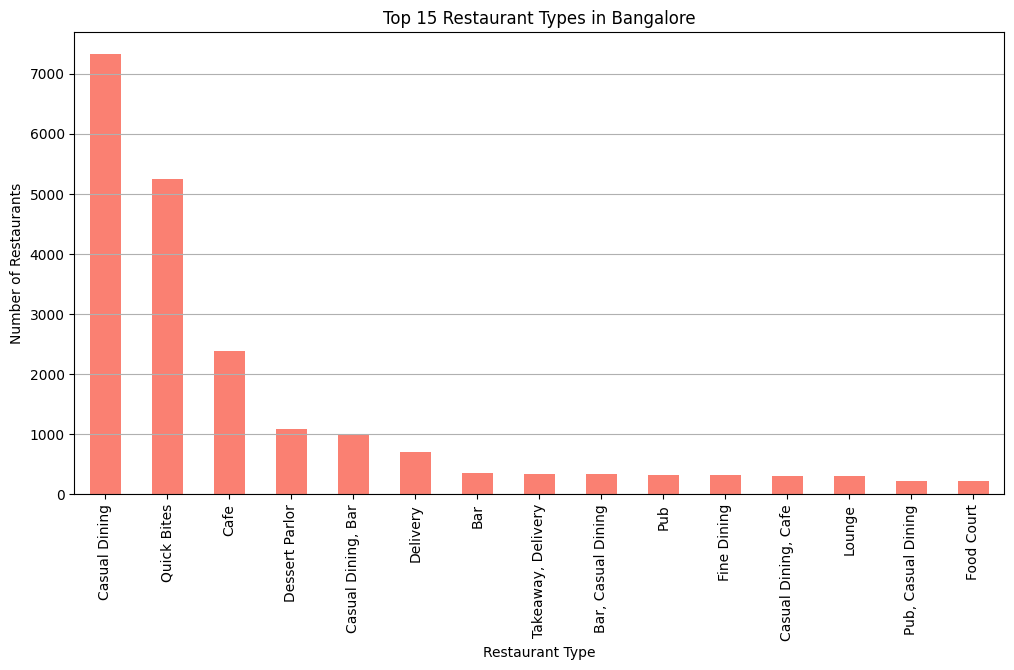

In [ ]:
restaurant_type_counts = df['rest_type'].value_counts().head(15)

plt.figure(figsize=(12, 6))
restaurant_type_counts.plot(kind='bar', color='salmon')
plt.title('Top 15 Restaurant Types in Bangalore')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Cost for Two

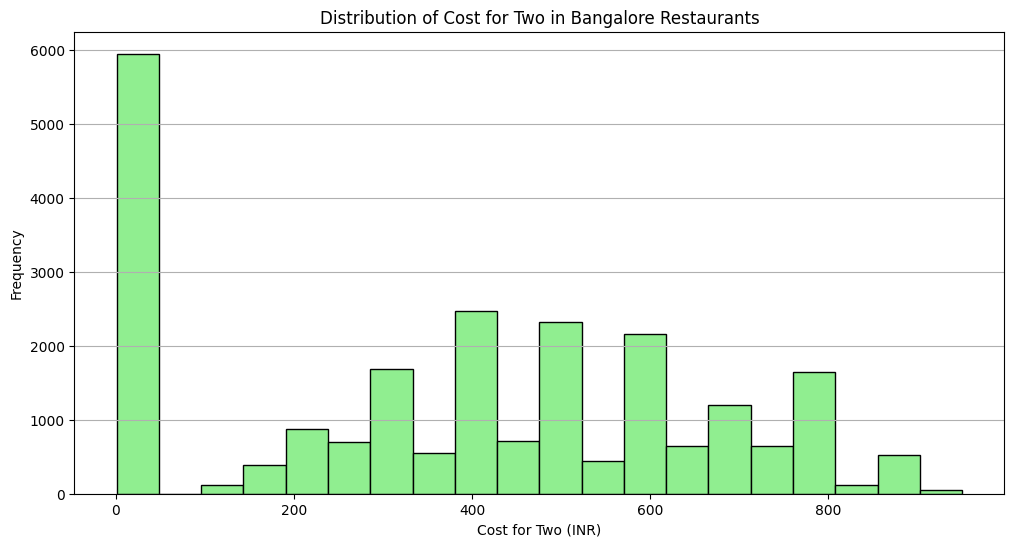

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['cost'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Cost for Two in Bangalore Restaurants')
plt.xlabel('Cost for Two (INR)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Online Orders

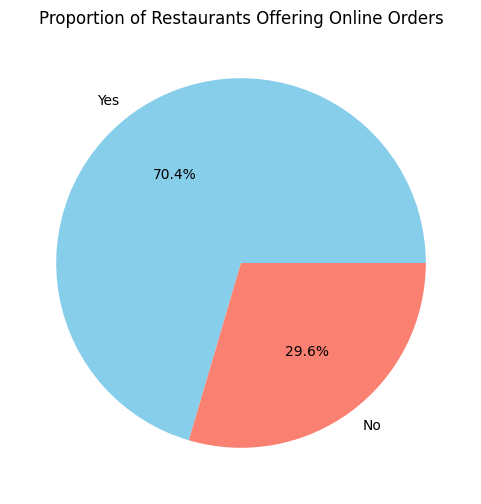

In [ ]:
online_order_counts = df['online_order'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proportion of Restaurants Offering Online Orders')
plt.show()

Table Booking

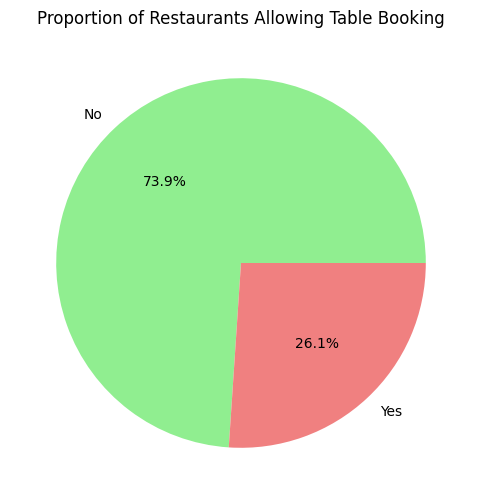

In [ ]:
book_table_counts = df['book_table'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(book_table_counts, labels=book_table_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Proportion of Restaurants Allowing Table Booking')
plt.show()

Ratings

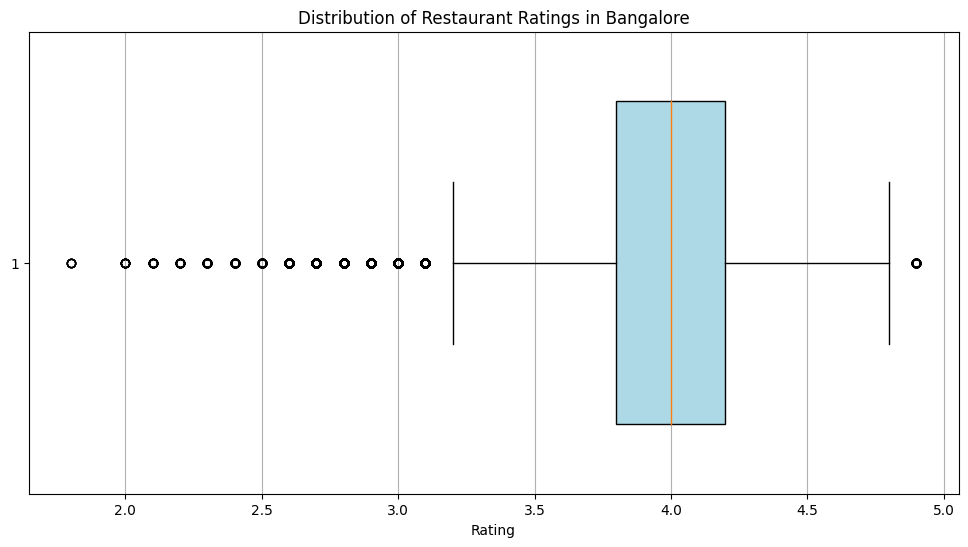

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['rate'].dropna(), vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Restaurant Ratings in Bangalore')
plt.xlabel('Rating')
plt.grid(axis='x')
plt.show()

Ratings vs. Votes

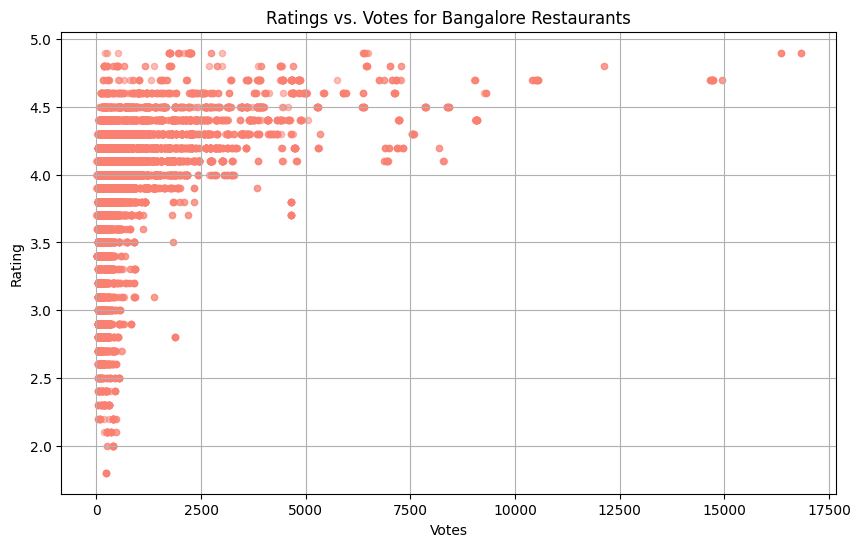

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['votes'], df['rate'], s=20, alpha=0.5, color='salmon')
plt.title('Ratings vs. Votes for Bangalore Restaurants')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.grid(axis='both')
plt.show()

Top Locations

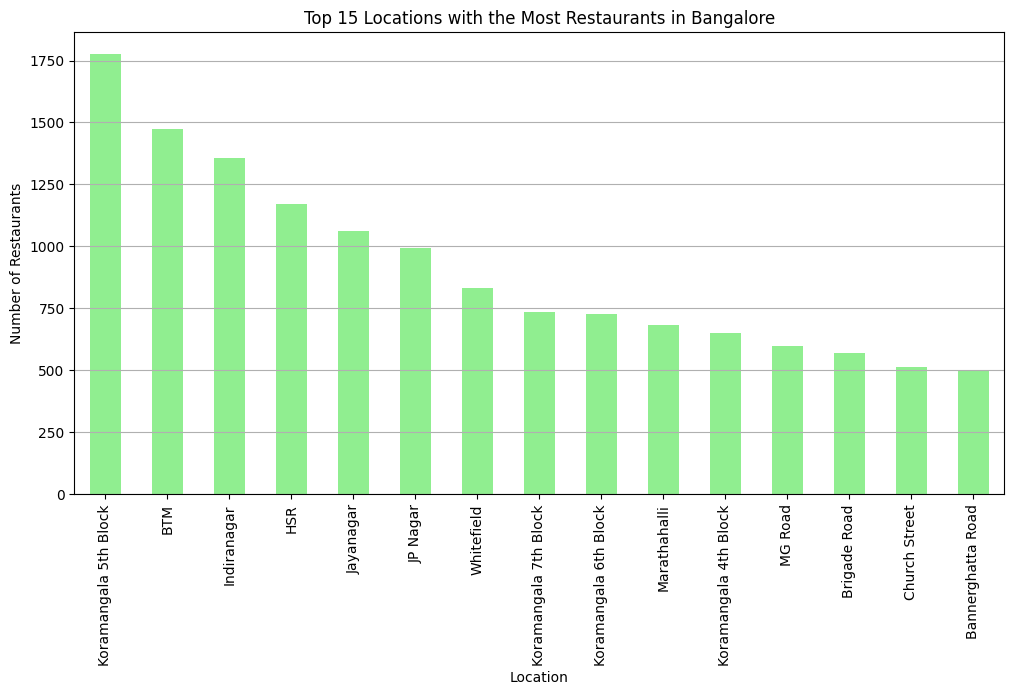

In [ ]:
location_counts = df['location'].value_counts().head(15)

plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 15 Locations with the Most Restaurants in Bangalore')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Top Dish Liked

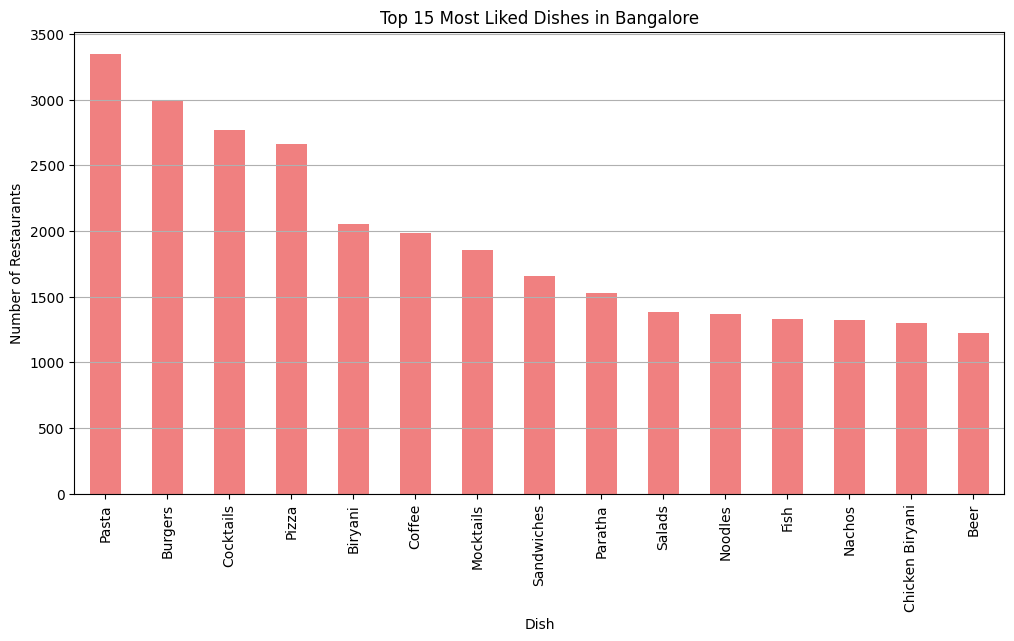

In [ ]:
dish_liked_counts = df['dish_liked'].str.split(', ').explode().value_counts().head(15)

plt.figure(figsize=(12, 6))
dish_liked_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 15 Most Liked Dishes in Bangalore')
plt.xlabel('Dish')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Correlation Heatmap

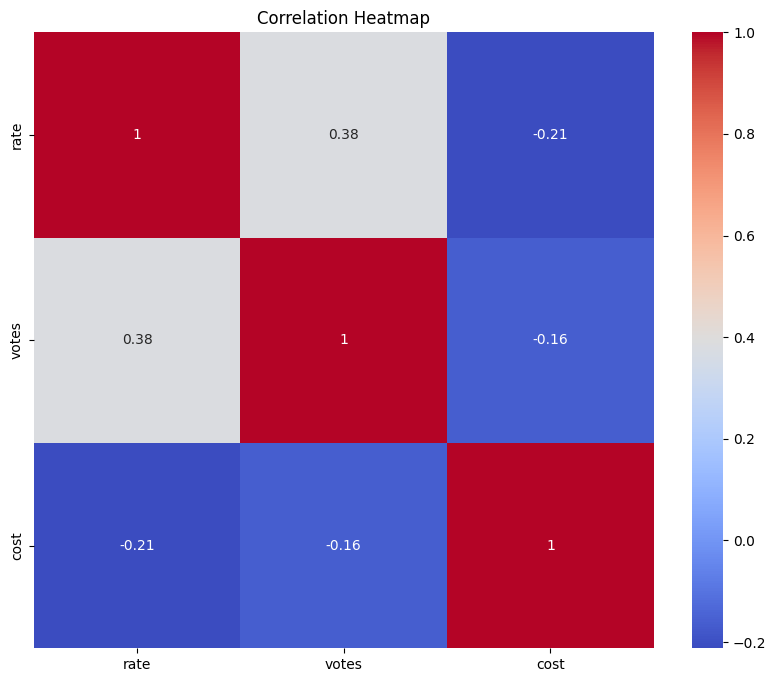

In [ ]:
# Filter and select numeric columns for correlation
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Online Orders by Cuisine

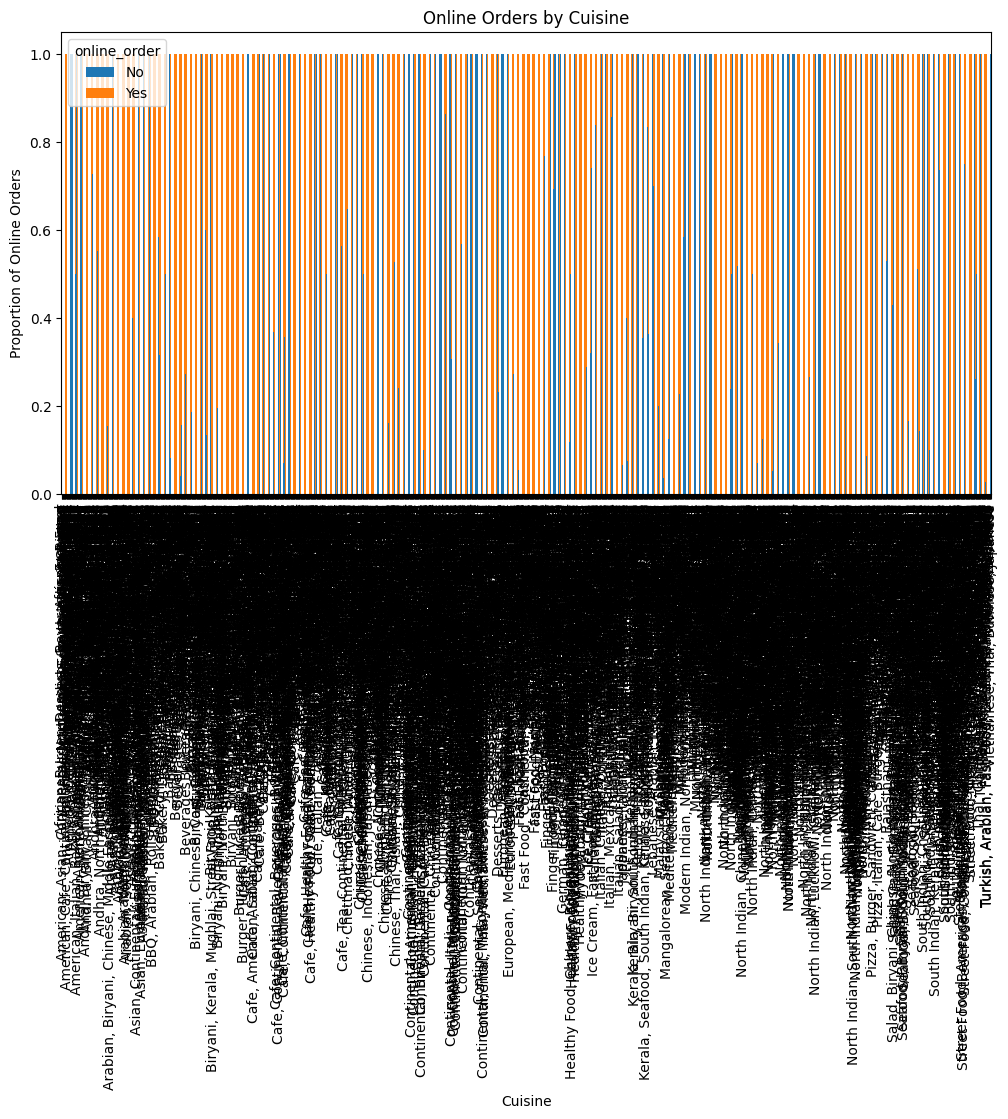

In [ ]:
online_order_cuisine = df.groupby(['cuisines', 'online_order']).size().unstack().fillna(0)
online_order_cuisine = online_order_cuisine.div(online_order_cuisine.sum(axis=1), axis=0)
online_order_cuisine.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Online Orders by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Proportion of Online Orders')
plt.xticks(rotation=90)
plt.show()

Table Booking by Cuisine

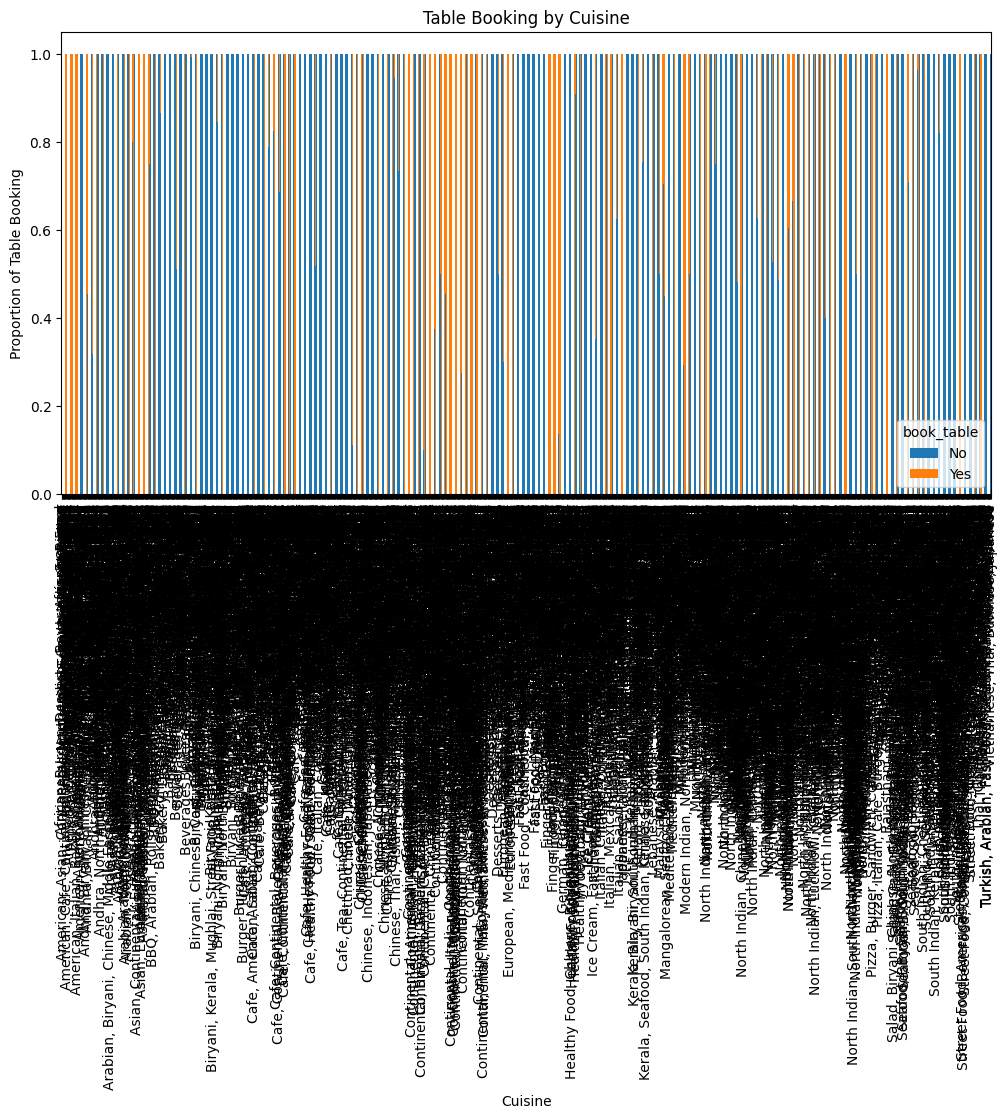

In [ ]:
table_booking_cuisine = df.groupby(['cuisines', 'book_table']).size().unstack().fillna(0)
table_booking_cuisine = table_booking_cuisine.div(table_booking_cuisine.sum(axis=1), axis=0)
table_booking_cuisine.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Table Booking by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Proportion of Table Booking')
plt.xticks(rotation=90)
plt.show()

## CLUSTERING

Get Coordinates of each neighbourhood

In [ ]:
location = [x for x in df['location'].unique().tolist() if type(x) == str]
latitude = []
longitude =  []
for i in range(0, len(location)):
    if(type(location[i]) == str):
        ctr=0
        while True:
            try:
                address = location[i] + ', Bengaluru, India'
                geolocator = Nominatim(user_agent="ny_explorer")
                loc = geolocator.geocode(address)
                latitude.append(loc.latitude)
                longitude.append(loc.longitude)
                print('The geograpical coordinate of location are {}, {}.'.format(loc.latitude, loc.longitude))
            except:
                ctr+=1
                if(ctr==7):
                    print(i)
                    latitude.append(address)
                    longitude.append(address)
                    break
                continue
            break

The geograpical coordinate of location are 12.9152186, 77.5736205.
The geograpical coordinate of location are 12.9417261, 77.5755021.
The geograpical coordinate of location are 12.9292731, 77.5824229.
The geograpical coordinate of location are 12.9081487, 77.5553179.
The geograpical coordinate of location are 12.9274413, 77.5155224.
The geograpical coordinate of location are 12.9466619, 77.5300896.
The geograpical coordinate of location are 12.9055682, 77.5455438.
The geograpical coordinate of location are 12.9287596, 77.6287122.
The geograpical coordinate of location are 12.9660722, 77.6125940647638.
The geograpical coordinate of location are 12.8918931, 77.598608.
The geograpical coordinate of location are 12.91226375, 77.59045672324466.
The geograpical coordinate of location are 12.911275849999999, 77.60456543431182.
The geograpical coordinate of location are 12.9489339, 77.5968273.
The geograpical coordinate of location are 12.9348429, 77.6189768.
The geograpical coordinate of loca

The geograpical coordinate of location are 12.965717999999999, 77.5762705372058.
The geograpical coordinate of location are 12.93103185, 77.6782471.
The geograpical coordinate of location are 12.9238287, 77.6540991.
The geograpical coordinate of location are 12.9552572, 77.6984163.
The geograpical coordinate of location are 12.9116225, 77.6388622.
The geograpical coordinate of location are 12.9593224, 77.6570522.
The geograpical coordinate of location are 12.9732913, 77.6404672.
The geograpical coordinate of location are 12.9277245, 77.6327822.
The geograpical coordinate of location are 12.9892546, 77.76812559925318.
The geograpical coordinate of location are 12.9755264, 77.6067902.
The geograpical coordinate of location are 12.9672765, 77.6065676.
The geograpical coordinate of location are 12.9749487, 77.5997248.
The geograpical coordinate of location are 12.9742939, 77.6525189.
The geograpical coordinate of location are 12.9778793, 77.6246697.
The geograpical coordinate of location a

The geograpical coordinate of location are 13.0093455, 77.6377094.


The geograpical coordinate of location are 13.0258087, 77.6305067.
The geograpical coordinate of location are 13.0358698, 77.6323597.
The geograpical coordinate of location are 13.0221416, 77.6403368.
The geograpical coordinate of location are 12.973936, 77.6509982.
The geograpical coordinate of location are 12.985098650000001, 77.66311735.


The geograpical coordinate of location are 12.9846713, 77.6790908.
The geograpical coordinate of location are 12.9368751, 77.5753517.
The geograpical coordinate of location are 13.0422794, 77.6248577.


72
The geograpical coordinate of location are 12.99359355, 77.58509974889078.
The geograpical coordinate of location are 12.9897994, 77.5717391.


The geograpical coordinate of location are 13.0027353, 77.5703253.
76
The geograpical coordinate of location are 12.9932236, 77.5391579.
The geograpical coordinate of location are 12.9882338, 77.554883.
The geograpical coordinate of location are 13.0378334, 77.5652106.
The geograpical coordinate of location are 13.022234699999998, 77.56718324768107.
The geograpical coordinate of location are 13.02383, 77.5529215.
The geograpical coordinate of location are 12.9578658, 77.6958748.
The geograpical coordinate of location are 13.0621474, 77.58006135480495.


The geograpical coordinate of location are 13.0464531, 77.5483803.
The geograpical coordinate of location are 13.1006982, 77.5963454.
The geograpical coordinate of location are 12.9756527, 77.5553548.
The geograpical coordinate of location are 13.007516, 77.695935.


In [ ]:
df['location_latitude'] = df['location'].map(dict(zip(location, latitude)))
df['location_longitude'] = df['location'].map(dict(zip(location, longitude)))

In [ ]:
df['location_latitude'] = pd.to_numeric(df['location_latitude'], errors='coerce')
df['location_longitude'] = pd.to_numeric(df['location_longitude'], errors='coerce')


In [ ]:
df = df.dropna(subset=['location_latitude', 'location_longitude'])


In [ ]:
#dataframe_filtered = df.groupby(['location'])['location_latitude', 'location_longitude'].first()
dataframe_filtered = df.groupby(['location'])[['location_latitude', 'location_longitude']].first()

dataframe_filtered['no_restaurant'] = df.groupby(['location'])['url'].count()
print(dataframe_filtered['location_latitude'].dtype)
print(dataframe_filtered['location_longitude'].dtype)


venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
i=0
for lat, lng, in zip(dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.features.Marker(
            [lat, lng],
            popup=str(dataframe_filtered.index[i]),
        )
    )
    i+=1
# add incidents to map
venues_map.add_child(states)
venues_map

float64
float64


Clustering on the basis of Cuisine

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cuisine = set()
def func(x):
    if(type(x) == list):
        for y in x:
            cuisine.add(y.strip())
_ = df['cuisines'].str.split(',').apply(func)
cui_df = df[['name', 'location', 'rate', 'cuisines']]
column_names = list(cuisine)
# instantiate the dataframe
cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])] = cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])].fillna(0)
cui_df

<ipython-input-36-d5fdf0c5e515>:11: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-36-d5fdf0c5e515>:11: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,name,location,rate,cuisines,Maharashtrian,Cantonese,Sandwich,Roast Chicken,Kerala,Coffee,...,Kashmiri,Lebanese,Mughlai,British,Steak,Street Food,Kebab,South American,French,Bar Food
0,Jalsa,Banashankari,4.1,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,Banashankari,4.1,"Chinese, North Indian, Thai",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,Banashankari,3.8,"Cafe, Mexican, Italian",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,Banashankari,3.7,"South Indian, North Indian",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,Basavanagudi,3.8,"North Indian, Rajasthani",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Whitefield,3.8,"North Indian, Continental, Mediterranean",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51707,M Bar - Bengaluru Marriott Hotel Whitefield,Whitefield,3.9,Finger Food,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51708,Keys Cafe - Keys Hotel,Whitefield,2.8,"Chinese, Continental, North Indian",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51711,Bhagini,Whitefield,2.5,"Andhra, South Indian, Chinese, North Indian",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cui_df = cui_df.reset_index(drop=True)

for i in range(0, len(cui_df)):
    for x in cuisine:
        if type(cui_df.loc[i, 'cuisines']) == str and x in cui_df.loc[i, 'cuisines']:
            cui_df.loc[i, x] = cui_df.loc[i, x]+1

cuisine_grouped = cui_df.groupby('location').sum()
cuisine_grouped.drop('rate', axis=1, inplace=True)
cuisine_grouped

<ipython-input-37-0b4597e1d7ce>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Maharashtrian,Cantonese,Sandwich,Roast Chicken,Kerala,Coffee,Modern Indian,Vietnamese,Bihari,Tibetan,...,Kashmiri,Lebanese,Mughlai,British,Steak,Street Food,Kebab,South American,French,Bar Food
location,,,,,,,,,,,,,,,,,,,,,
BTM,0,0,5,0,99,0,0,0,9,2,...,0,13,44,0,20,104,52,0,0,0
Banashankari,0,0,3,0,0,0,0,7,0,5,...,0,0,10,0,6,16,12,0,3,0
Banaswadi,3,0,0,0,8,1,0,2,0,2,...,0,0,8,0,0,14,4,0,0,0
Bannerghatta Road,5,0,6,0,8,0,0,5,0,0,...,0,0,11,0,9,25,0,0,0,0
Basavanagudi,0,0,12,0,0,0,0,0,0,0,...,0,0,2,0,0,49,8,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bangalore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Whitefield,12,0,8,0,22,0,2,4,0,3,...,4,0,37,4,9,17,4,0,15,0
Wilson Garden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Koramangala is divided into different block, lets combine them all
koramangala = ['Koramangala', 'Koramangala 1st Block', 'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala 4th Block',
'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Koramangala 8th Block']
koramangala_dict = dict(cuisine_grouped.loc[koramangala].sum())
cuisine_grouped = cuisine_grouped.drop(koramangala)
cuisine_grouped.loc['Koramangala'] = koramangala_dict

In [ ]:
cuisine_grouped

,Maharashtrian,Cantonese,Sandwich,Roast Chicken,Kerala,Coffee,Modern Indian,Vietnamese,Bihari,Tibetan,...,Kashmiri,Lebanese,Mughlai,British,Steak,Street Food,Kebab,South American,French,Bar Food
location,,,,,,,,,,,,,,,,,,,,,
BTM,0,0,5,0,99,0,0,0,9,2,...,0,13,44,0,20,104,52,0,0,0
Banashankari,0,0,3,0,0,0,0,7,0,5,...,0,0,10,0,6,16,12,0,3,0
Banaswadi,3,0,0,0,8,1,0,2,0,2,...,0,0,8,0,0,14,4,0,0,0
Bannerghatta Road,5,0,6,0,8,0,0,5,0,0,...,0,0,11,0,9,25,0,0,0,0
Basavanagudi,0,0,12,0,0,0,0,0,0,0,...,0,0,2,0,0,49,8,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whitefield,12,0,8,0,22,0,2,4,0,3,...,4,0,37,4,9,17,4,0,15,0
Wilson Garden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yelahanka,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# set number of clusters
kclusters = 3

bangalore_grouped_clustering = cuisine_grouped

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangalore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2], dtype=int32)

In [ ]:
cuisine_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [ ]:
cuisine_grouped.groupby('Cluster Labels').get_group(0)

,Cluster Labels,Maharashtrian,Cantonese,Sandwich,Roast Chicken,Kerala,Coffee,Modern Indian,Vietnamese,Bihari,...,Kashmiri,Lebanese,Mughlai,British,Steak,Street Food,Kebab,South American,French,Bar Food
location,,,,,,,,,,,,,,,,,,,,,
BTM,0,0,0,5,0,99,0,0,0,9,...,0,13,44,0,20,104,52,0,0,0
HSR,0,5,0,35,0,41,8,8,0,3,...,0,12,65,0,16,93,17,0,0,0
Indiranagar,0,7,0,26,0,30,16,19,22,0,...,0,8,49,0,53,52,18,0,3,0
JP Nagar,0,0,0,39,10,13,0,0,0,0,...,0,0,30,0,0,43,26,10,0,0
Jayanagar,0,18,0,34,0,11,0,2,9,0,...,0,0,45,0,0,63,25,0,0,0
Marathahalli,0,0,0,17,0,17,0,3,0,2,...,0,5,43,0,7,41,15,0,6,0
Whitefield,0,12,0,8,0,22,0,2,4,0,...,4,0,37,4,9,17,4,0,15,0


In [ ]:
cuisine_grouped.groupby('Cluster Labels').get_group(1)

,Cluster Labels,Maharashtrian,Cantonese,Sandwich,Roast Chicken,Kerala,Coffee,Modern Indian,Vietnamese,Bihari,...,Kashmiri,Lebanese,Mughlai,British,Steak,Street Food,Kebab,South American,French,Bar Food
location,,,,,,,,,,,,,,,,,,,,,
Banashankari,1,0,0,3,0,0,0,0,7,0,...,0,0,10,0,6,16,12,0,3,0
Banaswadi,1,3,0,0,0,8,1,0,2,0,...,0,0,8,0,0,14,4,0,0,0
Bannerghatta Road,1,5,0,6,0,8,0,0,5,0,...,0,0,11,0,9,25,0,0,0,0
Basavanagudi,1,0,0,12,0,0,0,0,0,0,...,0,0,2,0,0,49,8,0,5,0
Basaveshwara Nagar,1,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vijay Nagar,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
West Bangalore,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wilson Garden,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cuisine_grouped.groupby('Cluster Labels').get_group(2)

,Cluster Labels,Maharashtrian,Cantonese,Sandwich,Roast Chicken,Kerala,Coffee,Modern Indian,Vietnamese,Bihari,...,Kashmiri,Lebanese,Mughlai,British,Steak,Street Food,Kebab,South American,French,Bar Food
location,,,,,,,,,,,,,,,,,,,,,
Koramangala,2,0,0,94,0,124,21,38,45,8,...,9,26,166,0,125,215,52,0,0,2


In [ ]:
map_df = pd.merge(df[['location','location_latitude', 'location_longitude']].groupby('location').first(), cuisine_grouped, left_index=True, right_index=True)

In [ ]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
labels = set(kmeans.labels_)
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
j=0
for label in labels:
    group = map_df.groupby('Cluster Labels').get_group(label)
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6,
            )
        )
        i+=1
    colors = ['blue', 'green', 'purple']

    x = group.index
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)



venues_map

##CONTENT FILTRATION

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
# Initialize HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=2**10)  # Adjust n_features as needed

# Preprocessing: Handle missing data and convert 'cost' column to numerical values
if 'cost' in df.columns:
    df['cost'] = df['cost'].replace(',', '', regex=True).astype(float)

# Feature selection: Select the relevant columns for content-based filtering
features = ['name', 'location', 'rest_type', 'cuisines', 'dish_liked', 'rate', 'city']
df['content'] = df[features].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Transform using HashingVectorizer
hash_matrix = hash_vectorizer.transform(df['content'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(hash_matrix, hash_matrix)

def recommend(user_input):
    # Transform user input using HashingVectorizer
    user_hash = hash_vectorizer.transform([user_input])

    # Compute the cosine similarity between user input and restaurants
    cosine_sim_user = linear_kernel(user_hash, hash_matrix).flatten()

    # Get indices of restaurants sorted by similarity
    restaurant_indices = cosine_sim_user.argsort()[::-1]

    # Exclude the first index (self) and take top recommendations
    top_recommendations = restaurant_indices[1:6]

    # Display the top recommendations with all parameters
    recommended_restaurants = df.iloc[top_recommendations]
    print("Top 5 Recommended Restaurants:")
    print(recommended_restaurants[['name', 'rate', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost']])

# Example usage:
user_input = input("Enter your preferences (name, rate, location, rest_type, dish_liked, cuisines, cost): ")
recommend(user_input)

Enter your preferences (name, rate, location, rest_type, dish_liked, cuisines, cost): Jalsa
Top 5 Recommended Restaurants:
             name  rate      location      rest_type  \
7607        Jalsa   4.2  Marathahalli  Casual Dining   
21302       Jalsa   4.1  Banashankari  Casual Dining   
4806   Jalsa Gold   4.5  Marathahalli  Casual Dining   
20399       Jalsa   4.1  Banashankari  Casual Dining   
19401       Jalsa   4.1  Banashankari  Casual Dining   

                                              dish_liked  \
7607   mutton curry, stuffed mushroom, laccha paratha...   
21302  pasta, lunch buffet, masala papad, paneer laja...   
4806   phirni, butter chicken, cocktails, kadhai pane...   
20399  pasta, lunch buffet, masala papad, paneer laja...   
19401  pasta, lunch buffet, masala papad, paneer laja...   

                             cuisines   cost  
7607            North Indian, Mughlai    1.5  
21302  North Indian, Mughlai, Chinese  800.0  
4806   North Indian, Mughlai, Italian 

In [ ]:
# import pickle

# Save HashingVectorizer and cosine_sim to pickle files
# with open('hash_vectorizer.pkl', 'wb') as f:
#     pickle.dump(hash_vectorizer, f)

# with open('cosine_sim.pkl', 'wb') as f:
#     pickle.dump(cosine_sim, f)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assume that df_test is a DataFrame containing test data similar to the structure of your training data
df['content'] = df[features].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Transform using HashingVectorizer for test data
hash_matrix_test = hash_vectorizer.transform(df['content'])

# Evaluate precision, recall, and F1 score for each user input in the test data
precision_scores = []
recall_scores = []
f1_scores = []

for user_input_test, hash_user_input_test in zip(df['content'], hash_matrix_test):
    cosine_sim_user_test = linear_kernel(hash_user_input_test, hash_matrix).flatten()
    restaurant_indices_test = cosine_sim_user_test.argsort()[::-1]
    top_recommendations_test = restaurant_indices_test[1:6]
    recommended_restaurants_test = df.iloc[top_recommendations_test]['name'].values

    # Assuming 'actual_recommendations' is a column in your DataFrame'
    true_positive = len(set(recommended_restaurants_test) & set(df[df['content'] == user_input_test]['name'].values))
    false_positive = len(recommended_restaurants_test) - true_positive
    false_negative = len(df[df['content'] == user_input_test]['name'].values) - true_positive

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)

print(f'Average Precision: {average_precision:.2f}')
print(f'Average Recall: {average_recall:.2f}')
print(f'Average F1 Score: {average_f1:.2f}')


Average Precision: 0.20
Average Recall: 0.59
Average F1 Score: 0.29


In [ ]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(df, test_size=0.2, random_state=42)


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Define the parameter grid
# param_grid = {
#     'n_features': [2**10, 2**12],
#     'stop_words': ['english', None],
# }

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [text.lower() for text in X]

# Feature selection: Select the relevant columns for content-based filtering
features = ['name', 'location', 'rest_type', 'cuisines', 'dish_liked', 'rate', 'city']
df['content'] = df[features].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__C': [0.1, 1, 10],  # Adjust the values based on your model's hyperparameters
    'model__kernel': ['linear', 'rbf'],  # Adjust the values based on your model's hyperparameters
}

# Define the evaluation metric
scoring = make_scorer(f1_score, average='micro')

# Create a pipeline with text preprocessing, HashingVectorizer, and your recommendation model
pipeline = Pipeline([
    ('text_preprocessor', TextPreprocessor()),
    ('hash_vectorizer', HashingVectorizer(stop_words='english', n_features=2**10)),
    ('model', SVC())
])

# Initialize GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring)

# Prepare data
X_train = df['content']
y_train = df['name']  # Replace 'target' with your target variable

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_params = grid_search.best_params_
best_model = Pipeline([
    ('hash_vectorizer', HashingVectorizer(stop_words='english', n_features=2**10)),
    ('model', SVC(**best_params))
])

user_input = input("Enter your preferences (name, rate, location, rest_type, dish_liked, cuisines, cost): ")
recommend(user_input)

Validation

In [ ]:
# Prepare data for validation
X_val = hash_vectorizer.transform(validation_data['content'])
y_val = validation_data['name']  # Replace 'target' with your target variable

# Get predictions on the validation set
y_pred = grid_search.predict(X_val)

# Evaluate the model using the chosen metric
validation_score = f1_score(y_val, y_pred, average='micro')
print("Validation Score: ", validation_score)